# **Week 1**: *Feature Engineering and Feature Store*
***

# BERT (Bidirectional Encoder Representation from Transformers)
The BERT family of models have caused impact in the machine learning community, as it can achieve a state of the art performance in many natural language processing (NLP) tasks. It is based in the **transformer** architecture. The main innovation of these models is to apply the bidirectional nature of transformers to NLP (this means that BERT supports left-to-right and right-to-left simultaneously.)

## Feature Engineering
In the **prepare and transform** phase of the machine learning workflow, we have **feature engineering and feature store**. To do this in AWS we have **Amazon SageMaker Feature Store**. 

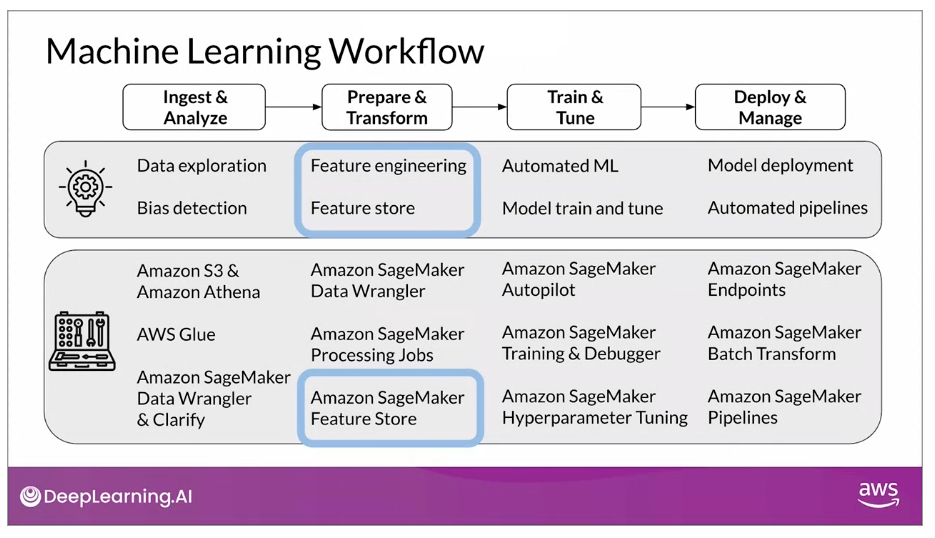

**Feature engineering** involves converting raw data from one or more sources into meaningful features, that can be used for training machine learning models. There you apply domain knowledge, your business acumen, and statistics to convert the raw data into features that can be readily used by machine learning algorithm chosen to solve a specific problem. You do this with two goals in mind:

1. You are preparing your data so that it best fits the machine learning algorithm of your choice
2. You try to improve the performance of the ML model

To achieve this you: 
1. select features; 
2. create new features; and 
3. transform features. 

This will depend on your available raw data.

## Feature Engineering Steps

### Feature Selection
In this step you identify the appropriate data attributes, or features, to include in your training dataset, as well as filter out many redundant and unusable features from the training dataset. This steps has the goal of **reducing the feature set dimensionality** so that the reduced feature set can help train your models faster, and in some cases even improve the performance of the model.

To perform feature selection you generally use the **feature importance score**. This can be done with Amazon SageMaker Data Wrangler. In the example below you can see that there are only there important features based on the feature importance score, hence, the rest of the features could be dropped from the training data set based on this method.

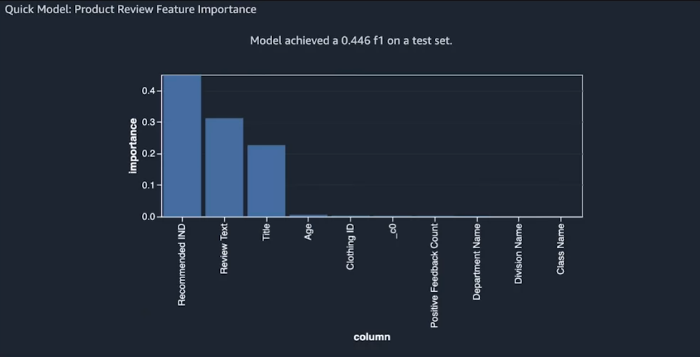

***

#### *[Machine Learning Mastery](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)*
**Statistical-based** feature selection methods involve evaluating the relationship between each input variable and the target variable using statistics and selecting those input variables that have the strongest relationship with the target variable. Though these methods can be fast and effective, the choice depends on the data type of both the input and the output variables.

**Feature selection methods** are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable. Some predictive tasks have a large amount of variables that can slow the modeling process and require high amount of memory. Additionally, the performance of some models can degrade when including input variables that are not relevant to the target variable.

You can classify the feature selection methods in **supervised** and **unsupervised**. The difference being whether they use in the process the target variable or not. Unsupervised methods eliminate redundant variables by using *correlations*; while supervised methods use the target variable alongside techniques that remove irrelevant variables.

For the **supervised** methods you can subdivide them into **wrapper** and **filter** methods. These methods are evaluated based on the performance of a resulting model on a hold out dataset. The wrapper feature selection methods create many models with different subsets of input features and select those features that result in the best performing model according to a performance metric. These methods are unconcerned with the variable types, although they can be computationally expensive. [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) is an example of this. Filter feature selection methods use statistical techniques to evaluate the relationship between each input variable and the target variable, and these scores are used as the basis to choose (filter) those input variables that will be used in the model.

Finally we have machine learning algorithms that perform feature selection automatically as part of the learning model. We might refer to these techniques as intrinsic feature selection methods. This includes algorithms that penalize not-relevant variables such as Lasso and decision trees. 

**Dimensionality reduction** is an alternate to feature selection: both seek fewer input variables to a predictive model, but feature selection selects features to keep or remove from the dataset, whereas dimensionality reduction creates a projection of the data resulting in entirely new input features.

##### Summary
+ **Feature selection**: select a subset of input features from the dataset
    + **Unsupervised**: do not use the target variable (*i.e.* remove irrelevant variables).
        + Correlation
    + **Supervised**: use the target variable (*i.e.* remove irrelevant variables).
        + **Wrapper**: search for well-performing subset of features
            + RFE (recursive feature elimination)
        + **Filter**: select subsets of features based on their relationship with the target variable
            + Statistical methods
            + Feature importance methods
        + **Intrinsic**: algorithms that perform automatic feature selection during training
            + Lasso (leas absolute shrinkage and selection operator)
            + Decision trees
+ **Dimensionality reduction**: project input data into a lower-dimensional feature space

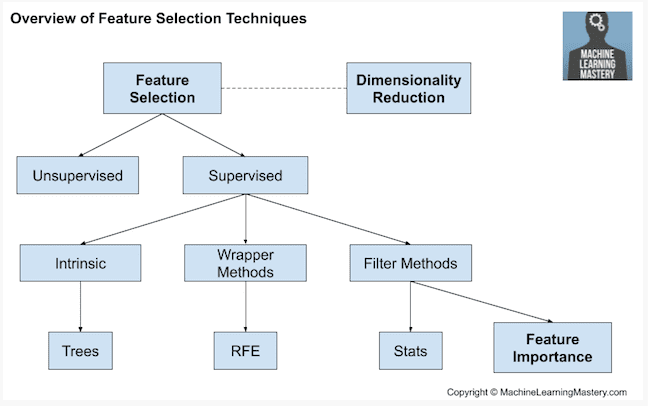

##### **Statistics for Filter-Based Feature Selection Methods**
It is common to use correlation type statistical measures between input and output variables as the basis for filter feature selection. As such, the choice of statistical measures is highly dependent upon the variable data types. The common input and output data types are:

+ **Numerical variables**
    + Integer variables
    + Floating point variables
+ **Categorical variables**
    + Boolean variables
    + Ordinal variables
    + Nominal variables

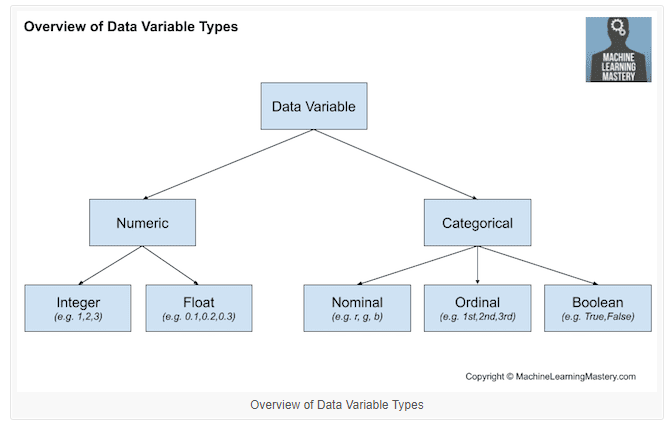

Our target is to reduce the number of *input* variables based on their relevance in predicting the *output* variable. The statistical measures used in filter-based feature selection are generally calculated one input variable at a time with the target variable. As such, they are referred to as univariate statistical measures. This may mean that the interaction between input variables is not considered in the filtering process.

> In this case, the existence of correlated predictors makes it possible to select important, but redundant, predictors. The obvious consequences of this issue are that too many predictors are chosen and, as a result, colinearity problems arise.

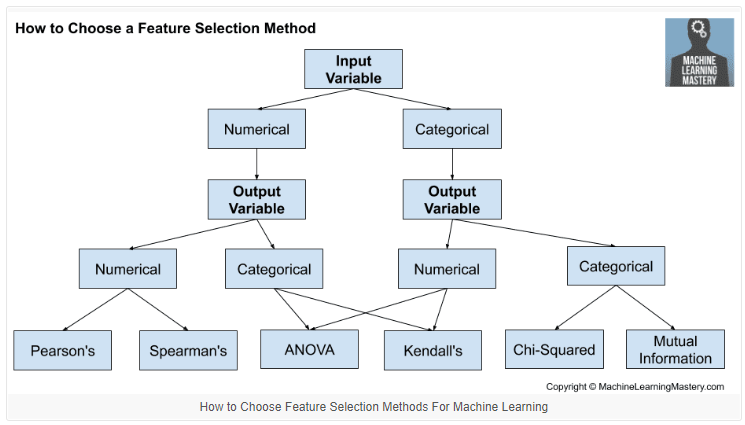

+ **Numerical Input, Numerical Output**:this is a regression predictive modeling problem. The most common techniques are to use a correlation coefficient, such as Pearson's for a linear correlation, or rank-based methods for a nonlinear correlation.
    + *Pearson's correlation coefficient* (linear)
    $$\rho_{X,Y} = \frac{\mathbb{E}(X,Y) - \mathbb{E}[X]\mathbb{E}[Y]}{\sqrt{\mathbb{E}[X^2]-(\mathbb{E}[X])^2}\sqrt{\mathbb{E}[Y^2]-(\mathbb{E}[Y])^2}}=\frac{\text{cov}(X,Y)}{\sigma_X\sigma_Y}$$
    + *Spearman's rank coefficient* (nonlinear)
+ **Numerical Input, Categorical Output**: this is a classification predictive modeling problem. The most common techniques are correlation based, although in this case, they must take the categorical target into account. 
    + *[ANOVA correlation coefficient](https://www.reneshbedre.com/blog/anova.html)* (linear): this tests whether there are statistically significant differences between more than two groups. This means it is the extension fo the *t-test* for independent samples to more than two groups (we look if there is a statistical significant difference between the means of the groups). 
    + *Kendall's rank coefficient* (nonlinear): assumes the categorical variable is ordinal
+ **Categorical Input, Numerical Output**: this is a strange regression task situation. *You could use the same techniques as in Numerical Input, Categorical Output*, but in reverse.
+ **Categorical Input, Categorical Output**: 
    + *Chi-Squared test* (contingency tables)
    + *Mutual information*: it is a powerful method that may prove useful for both categorical and numerical data (*i.e.* it is agnostic to the data types).
***

### Feature Creation
In this step you combine existing features into new features, or you can infer new attributes from existing ones. The idea here is creating and using these new features, you lead your machine learning model to produce more accurate prediction. 

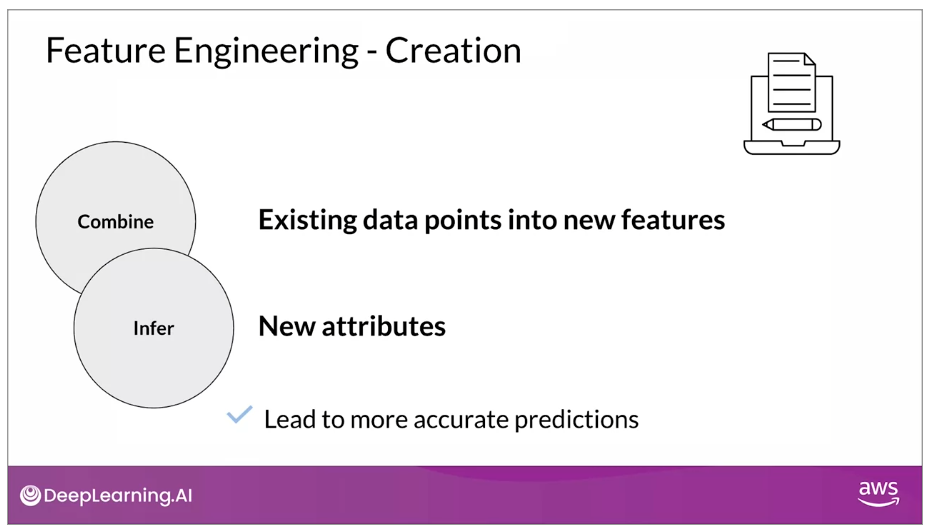

### Feature Transformation
In this step you could: **calculate missing values** using techniques like imputation, **scaling numerical features** values (using techniques like standardization and normalization), **converting non-numerical features into numerical values** so that the algorithm can make sense of these features (*e.g.* converting text data into embedding vectors, or categorical variables into binary variables). 

This includes the transformation of categorical data into binary or ordinal variables. Also, you can transform text data, such as reviews into vector representations using **embeddings**.

## Feature Engineering Pipeline
A generic feature engineering pipeline would be follow this sequence:

1. **Select features and labels**
2. **Balance the dataset by label**: this is done to correct representation from all classes of the labels
3. **Split the dataset** into training, validation and test datasets. You first split your dataset into train and test. Then while training your models, you will split the training dataset between train and validation, where the validation dataset is used to tune the hyperparameters of the models. Finally you evaluate the model with the test dataset.
4. **Transform** the features by applying the transformation techniques we've seen.

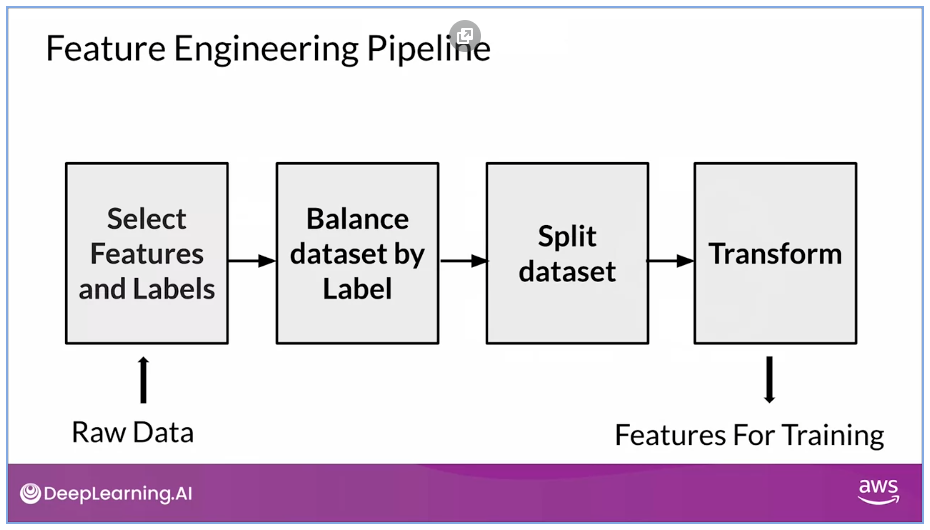



## BERT: Bidirectional Encoder Representations from Transformers
The BERT algorithm (neural network based technique) is used to solve natural language processing (NLP) tasks. It is based on the **transformer** architecture, and they process text to generate embeddings, which in this case operates at a sentence level (BlazingText generates embeddings at a word level). Additionally, using the bidirectional nature of the transformer architecture, BERT can capture context of a word. 

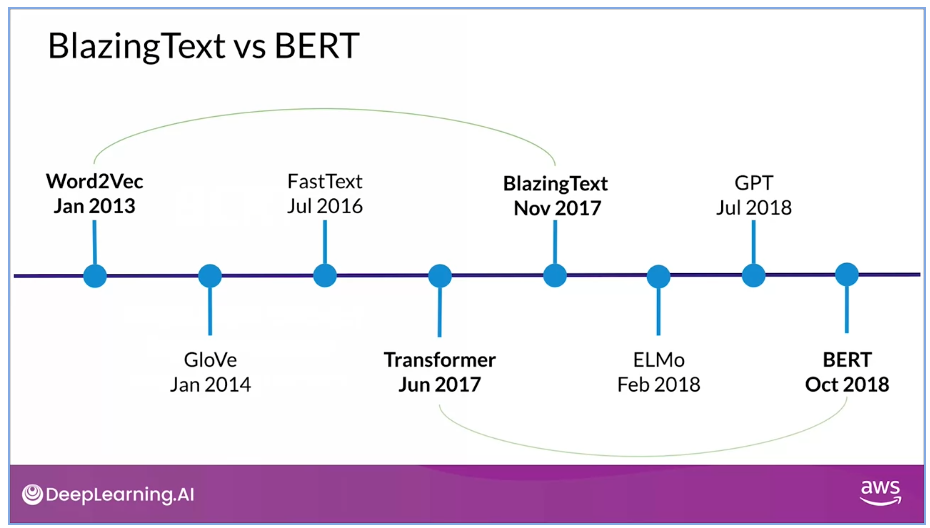

BlazingText learns word-level embeddings for all the words that are included in the training corpus. These vectors, or embeddings, are the projected into a high-dimensional vector space. This will result in similar words having vector representations close together in the learned vector space. This also means that the embedding of words is the same regardless of the context in which it is used.

On the other hand, with BERT the input is not the word, but the sentence itself. The output is also an embedding, but this time, the embedding is based on three individual components: **token, segment, and position**. This is also combined with the bidirectional nature of BERT, which helps add context from the words that follow a key word/sequence of words. This results in different embeddings for the same words, depending on the context in which the word is found, where the output embedding is of a fixed shape (*i.e.* the shape of the embedding vector is not affected by the additional context given to each word, but the values in it reflect this context).

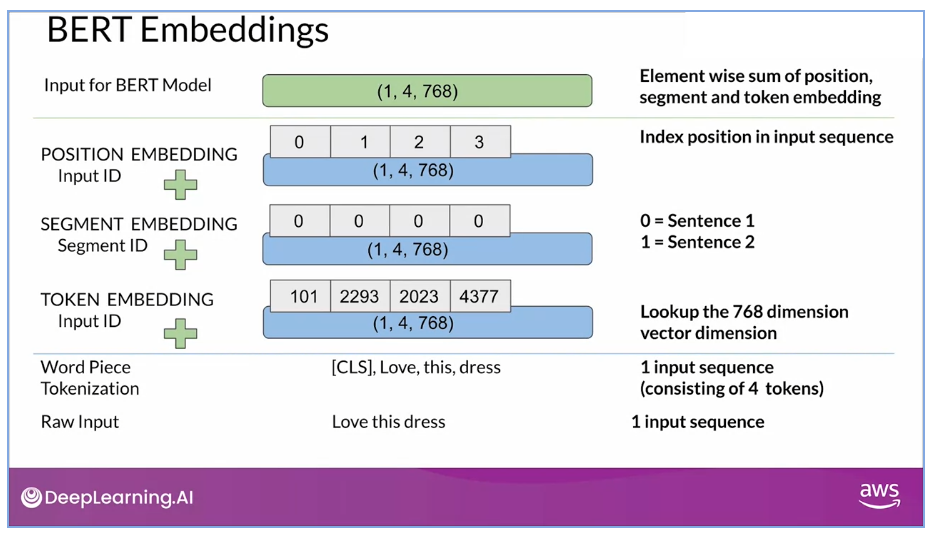

+ In the example above we start with the **raw input** (in this case is just one text sequence, but we could also start with two sequences in a question-answer scenario)
+ Then we apply **word piece tokenization** (it is a technique that is used to segment words into sub-words and is based on pre-trained models with the dimension of 768). In addition to the tokens coming from the individual words of the sentence, you also see a special token `CLS` (it specifies that this is a classification problem; if my input sequence consisted of multiple sentences, then I would see another special token `SEP` that separates the tokens from the individual sentences).
+ Then we apply **token embedding**. To determine the token embedding for the individual tokens, all we have to do is simply look at the tokens based on the token ID to get the 768-dimensional vector. In the example above the token ID for the token `CLS` is `101`, and `2293` for `Love`.
+ Perform **segment embedding**. This becomes much more important when there are multiple sentences in the input sequence. The segment ID of 0 represents that a sentence is the first sentence in the sequence, and similarly the segment embedding of 1 represents that it is a second sentence in the input sequence. 
+ Apply **position embedding**. The position ID determines the index position of the individual token in the input sequence (in this example there are only 4 positions)
+ Finally we generate the **input for BERT model**, which is the element wise sum of position, segment and token embeddings. 

## Feature Engineering: At Scale With Amazon SageMaker Processing Jobs
To generate BERT embeddings from raw text programmatically  we will use the RoBERTa tokenizer class. The RoBERTa model is built on top of the BERT model, but it modifies a few hyper-parameters and the way the model is trained. It also uses a lot more training data than the original BERT model. This results in significant performance improvements in a variety of NLP tasks when compared with the original BERT model.

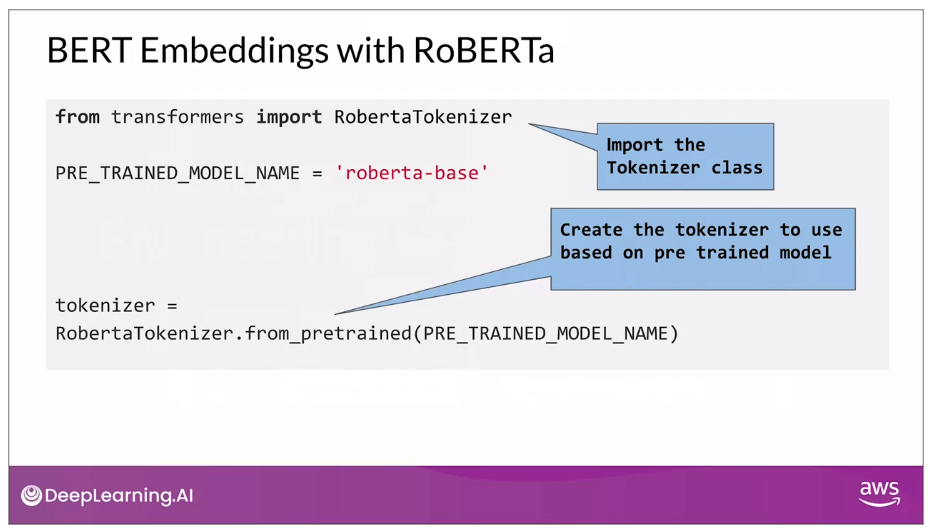

1. To start using the RoBERTa tokenizer your first import the class and then your construct an object `tokenizer``. To construct the tokenizer class, you specify the pre-trained model, which in this case is RoBERTa base. 

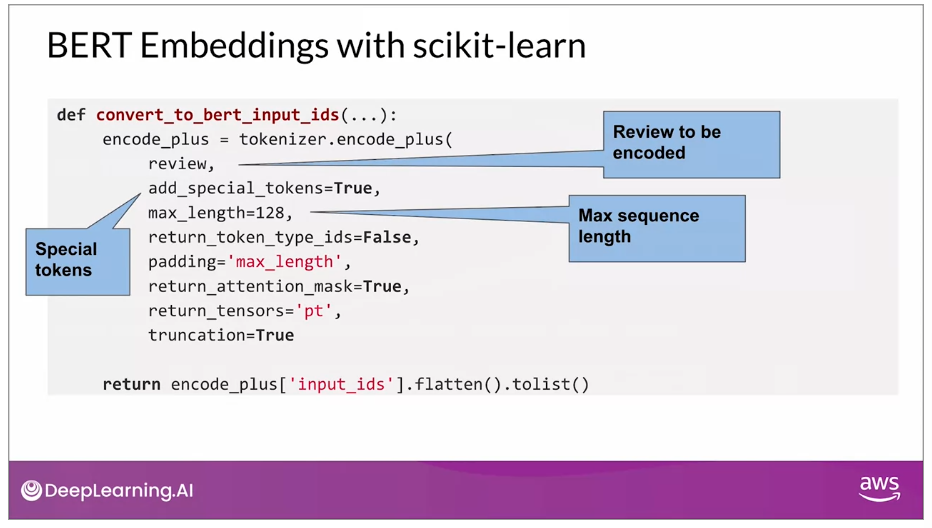

2. Then your run the `encode_plus` method, which receives the raw review as the first parameter, which will be encoded. You also determine whether you will add special tokes `add_special_tokens`, and a parameter that determines which is the maximum length of a input review `max_length` (this can be computed by analyzing your training dataset, and specifies the maximum amount of tokens that can be passed into the RoBERTa model with a single sample). 

3. Once you have determined all the necessary parameters, generating the embeddings is really straightforward: just run the `encode_plus` method. However, the real challenge comes in when you have to generate these embeddings at scale. The challenge is performing feature engineering at scale, and to address the challenge, you will use **Amazon SageMaker Processing**, which allows you to perform data related tasks such as, pre-processing, post-processing, and model evaluation at scale. This is done by providing a distributed cluster to run the process. By specifying some parameters you can control how many nodes and the type of nodes that make up the distributed cluster. The SageMaker Processing job executes on the distributed cluster that you configure. 

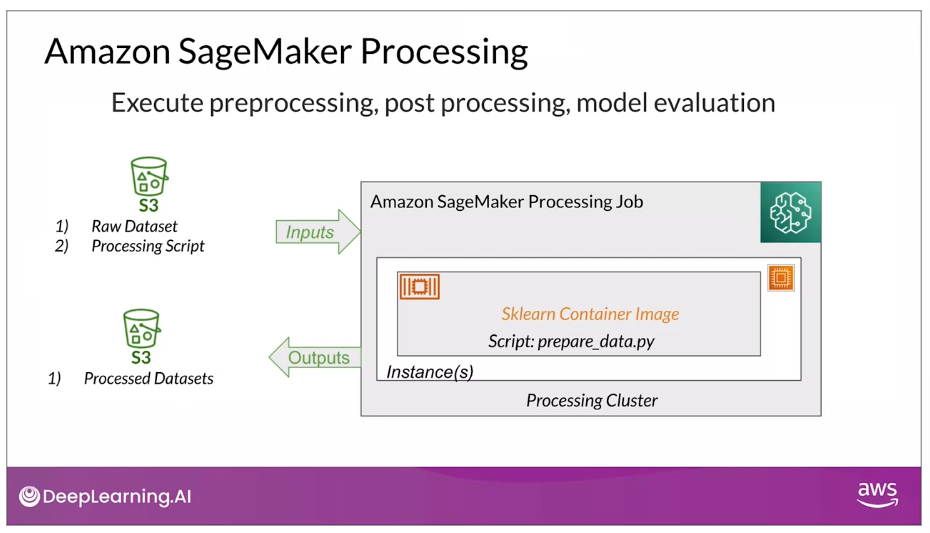

SageMaker Processing provides a built-in container for Scikit-Learn.  The code that you use with Scikit-Learn and RoBERTa  tokenizer should work out-of-the-box using SageMaker Processing. The SageMaker Processing expects data to be in a S3 bucket, as well as the output is deposited in one S3 bucket. 

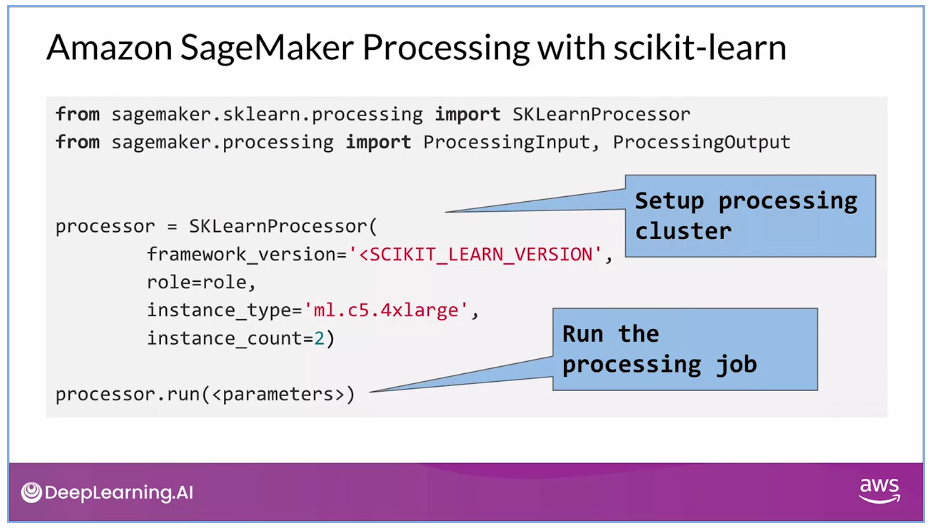

4. To use SageMaker Processing with Scikit-Learn, your start by importing the classes needed. The you set up the processing cluster using the `sklearn` processing object. To this object you pass in the framework version of the Sklearn you would like to use, as well as the instance count and the instance type that make up the distributed cluster. Once you have set up this, you simply run the `run` method with a few parameters. These parameters include a script to execute, which is a Python script that consists of the Sklearn code to generate the embeddings. Additionally, you provide the processing input that specifies the location of the input data in the S3 bucket. Finally, you specify where in S3 the output should go to.

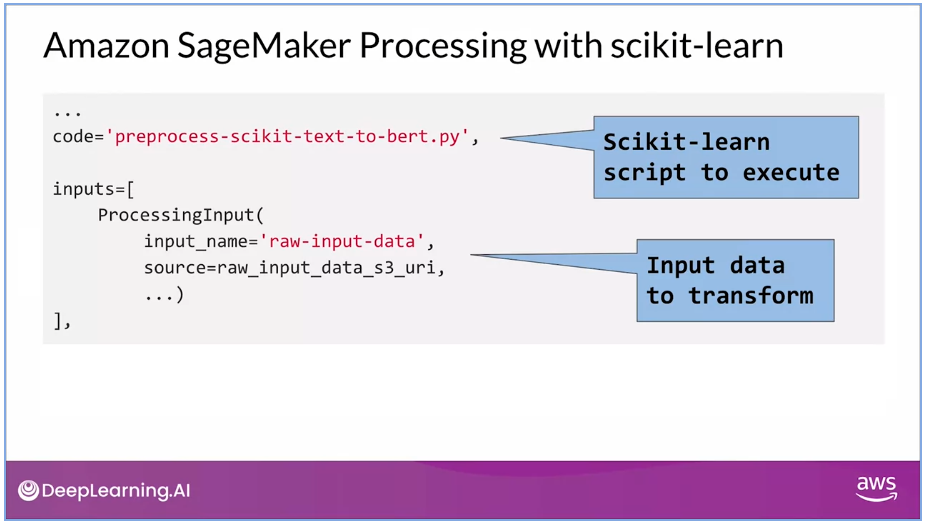

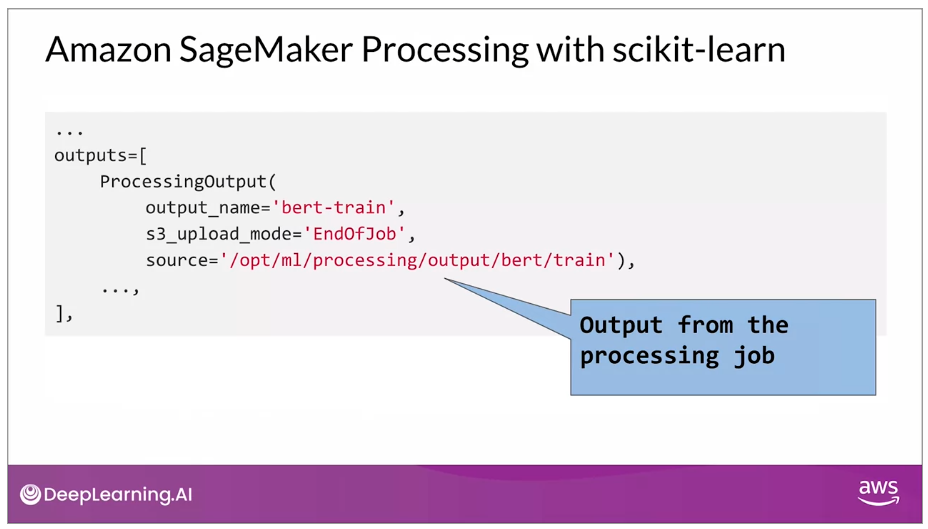

## Feature Store
A lot of effort goes into feature engineering. It would save you a lot of time of you can store the results of feature engineering efforts, and reuse those results, so that you don't have to run the feature engineering pipeline again and again. It would save time not only for you, but for any other teams in your organization, that may want to use the same data and same features, for their own machine learning projects.

**Feature Store** is a repository to store engineered features. For such a feature store, there are three high level characteristics to consider:

1. You want the feature store to be centralized, so that multiple teams can contribute their features to this centralized repository.
2. You want the features from the feature store to be reusable. This is to allow reuse of engineered features, not just across multiple phases of a single machine learning project, but across multiple machine learning projects.
3. You want the feature store to be discoverable, so that any team member can come in and search for the features they want, and use the search results in their own machine learning projects

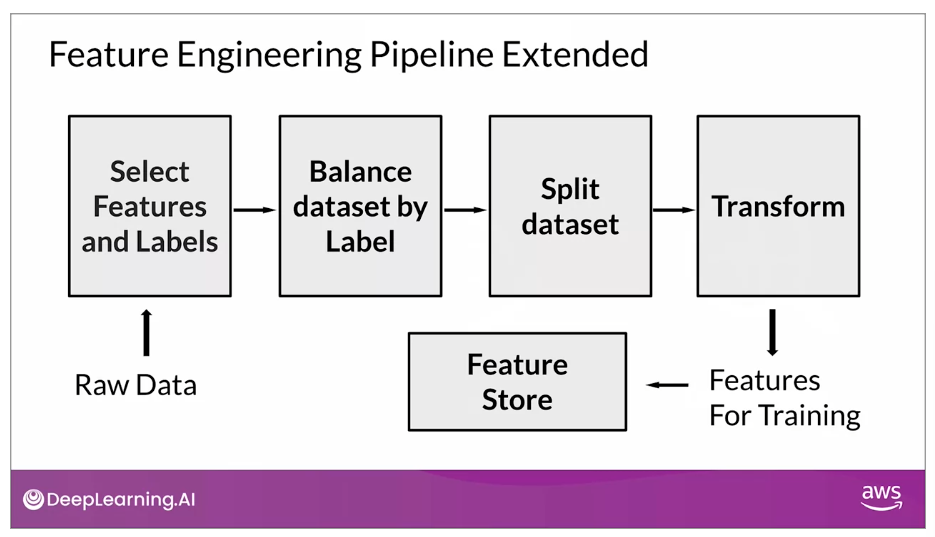

Adding to the feature engineering pipeline that we saw previously, we see that we can store the features for training the model in `feature_store`.

## Amazon SageMaker Feature Store
**SageMaker Feature Store** is a fully managed service that provides purpose-built feature store. The capabilities of SageMaker Feature Store closely aligns with the desirable characteristic for any feature store that were reviewed in the previous section.

+ Provides you with a centralized repository to securely save and serve features from
+ Provides you with the capabilities to reuse the features, not just across a single machine learning project, but across multiple projects. This reduces the skew by reusing the features across training and inference traces and by keeping the features consistent
+ Provides the capability to create the features both in real time and batch. This supports near real-time ML predictions and model training for the batch mode.

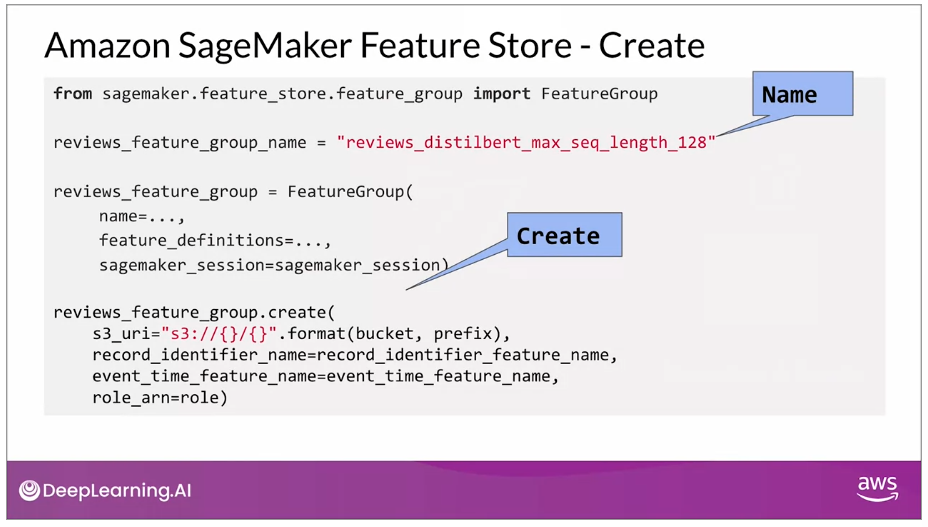

To start using Feature Store you must import `FeatureGroup` class, which is a construct that allows you to group multiple features together and treat them as a set. Then create an instance of `FeatureGroup` object, which expects a `name` and also a list of feature definitions (they capture the individual name and type of the features). 

Once you have this, you then can create the feature group, where you define where the feature group will be stored. Once you have created this you then `ingest` features into the feature group in a multi-threaded fashion. Once the groups are populated, you can retrieve the features by taking advantage of the retrieve APIs

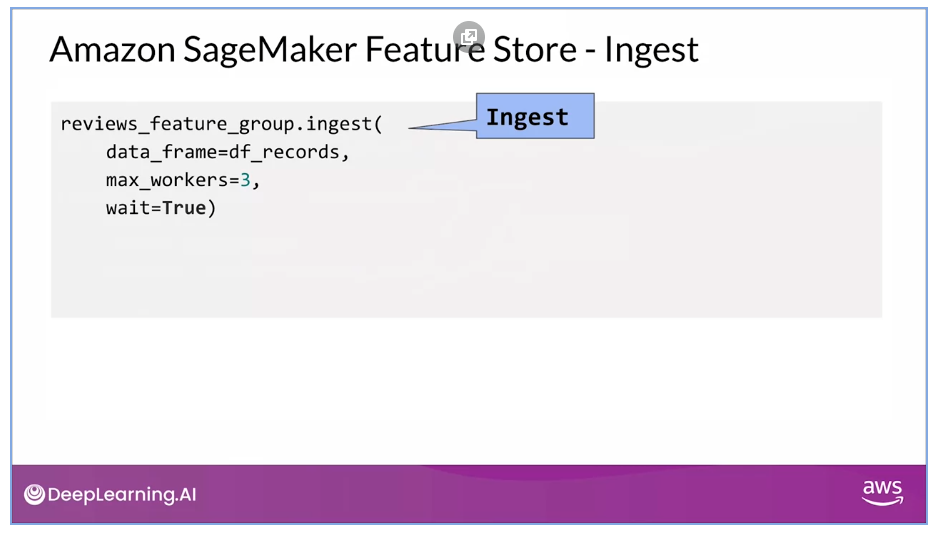

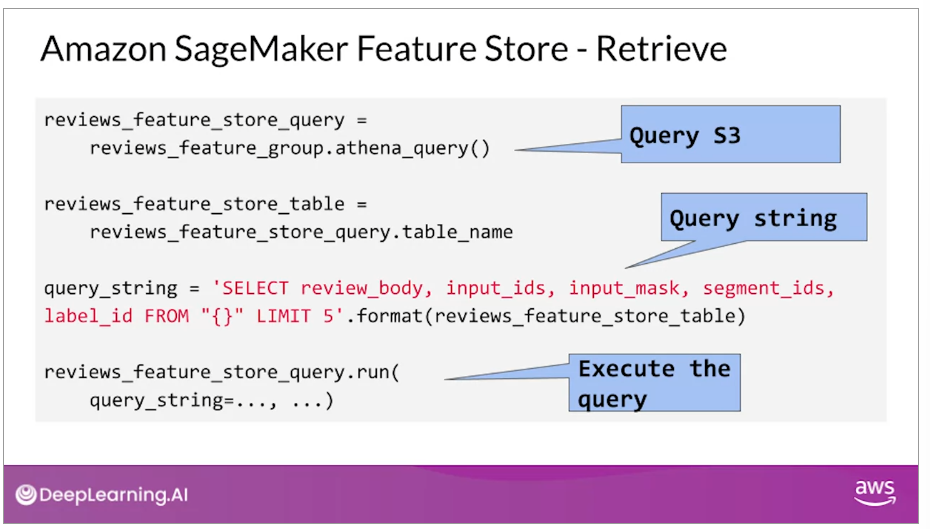

The features are directly retrieved from the S3 location where they were stored, taking advantage of the `athena_query` object. Once you have defined the query string, you run the `run` method on the Athena query object by passing the `query_string` to it. This returns the queried features in a `pandas.DataFrame` format. Now you have an option to store the data frame into a CSV file, and that CSV into a S3 location and use it as an input to a training job on SageMaker.

# **Week 2:** *Train, Debug, and Profile a Machine Learning Model*
***

## Train and Debug a Custom Machine Learning Model
RoBERTa model was introduced by a research team at Facebook AI and collaborators from the University of Washington in 2019. RoBERTa builds on the BERT model architecture but modifies some model hyperparameters and the way the model is trained, including the use of more training data. This leads to significant performance improvements in a variety of NLP tasks compared to BERT.

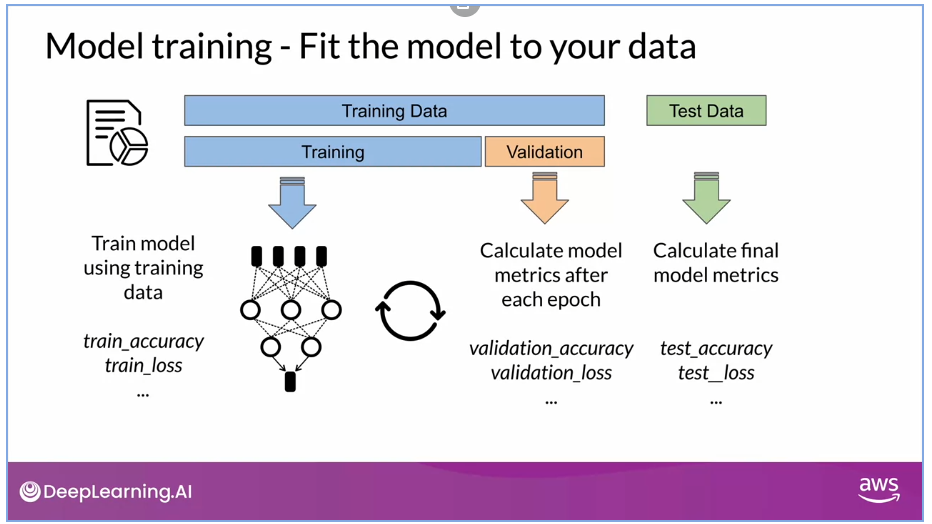

Fine tuning the RoBERTa model is a supervised learning step. You will use the engineered features from the raw data, together with the sentiment label, as your training data. You will split your data into training, validation and testing datasets. You will use the training dataset to fine tune the RoBERTa model and calculate model training metrics, such as the training accuracy and the training loss.

You will validate the model performance after each epoch (a full pass through the training dataset) using the validation dataset. In this step you compute the validation accuracy and the validation loss, using this to fine tune the hyperparameters of the model. Once you finish training your model, you will sue the test dataset the model hasn't seen before to calculate the final model metrics, such as the test accuracy and test loss. You use the final model metrics to compare competing models.

## Pre-Trained Models
Training NLP models from scratch can be very time-consuming and expensive. For example, training the BERT model's 110 or 340 million parameters from scratch could take multiple days, depending on the CPU or GPU resources you have available. Luckily, there are many pre-trained models available, which you can use to simply adapt them to your use case and your dataset.

Let's see first the differences between built-in algorithms and pre-trained models. The **built-in algorithm provided all required code to train the text classifier**. You just pointed the algorithm to the prepared training data. On the other hand **pre-trained algorithms have already been trained on large collections of data**, and you will then provide specific text data to adapt the model to your text domain and also provide your task and model training code. Pre-trained models take advantage of the features learned by models trained on larger datasets, and just fine tune the deeper layers to adapt those features learned to the specific problem you are solving.

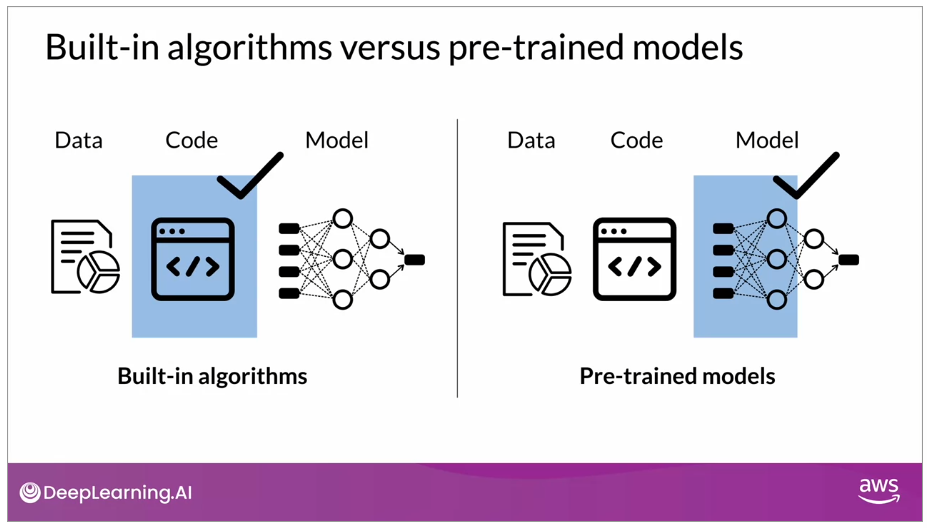

Pre-trained NLP models have been trained on large text corpus (*e.g.* book collections, Wikipedia). In the unsupervised learning step, the model builds vocabulary of tokens, from the training data, and learns the vector representations You can also pre-train NLP models on specific language data (*e.g.* German language text -GermanBERT, patent text -PatentBERT, etc.). You then use this pre-trained models and adapt them to your specific dataset. This process is called **fine tuning**. 

![](image.png)

**Transfer learning** is a machine learning technique where a model is trained on one task and then repurposed on a second related task. This is what we're doing with fine tuning. This process is way faster than pre-training, as the model doesn't have to learn millions or billions of BERT vector representations. Fine-tuning is a supervised learning step, as you fit the model using labeled training data, adding a few deep layers with a classification task (in this case).

Many of the popular machine learning frameworks (*e.g.* PyTorch, TensorFlow) have dedicated model hubs, or zoos, where you can find pre-trained models. The open source NLP project, Hugging Face, also provides an extensive model hub with over 8K pre-trained NLP models. 

If you want to deploy pre-trained models straight into your AWS account, you can use **SageMaker JumpStart** to get easy access to pre-trained text and vision models. JumpStart works with PyTorch Hub and TensorFlow Hub and lets your deploy supported models in one click into SageMaker model hosting environment. JumpStart also provides a collection of solutions for popular machine learning use cases, such as, for example, fraud detection in financial transactions, predictive maintenance, demand forecasting, churn prediction, and more. When you choose a solution, JumpStart provides a description of the solution and the launch button. There's no extra configuration needed. Solutions launch all of the resources necessary to run the solution, including training and model hosting instances. After launching the solution, JumpStart provides a link to a notebook that you can use to explore the solutions' features. If you don't find a suitable model via JumpStart, you can also pull in other pretrained models via custom code.

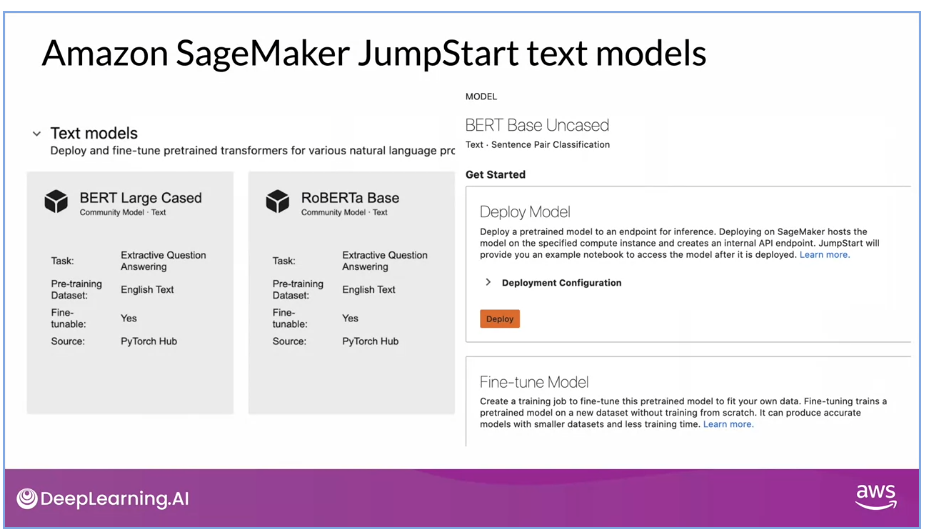

## Pre-Trained BERT
As BERT sees new text, the model masks 15 percent of the words in each sentence. BERT then predicts the masked words and corrects itself, meaning it updates the model weights when it predicts incorrectly. This step is called **masked language model (MLM)**. Masking forces the model to learn the surrounding words for each sentence. 

At the same time BERT is masking and predicting words, or to be more precise, input tokens, it is also performing **next sentence prediction (NSP)** on pairs of input sequences. To perform NSP, BERT randomly chooses 50% of the sentence pairs and replaces one of the two sentences with a random sentence from another part of the document. BERT predicts if the two sentences are a valid sentence pair or not. BERT will correct itself when it predicts incorrectly. 

Both of those training tasks are performed in parallel to create a single accuracy score for the combined training efforts. This results in a more robust model capable of performing word and sentence level predictive tasks. Note that this pre-training step is implemented as unsupervised learning. The input data is large collections of unlabeled text. 

In many cases you don't need to train BERT from scratch. Neural networks are designed to be re-used and continuously trained as new data arrives into the system. Since BERT has already been pre-trained on millions of public documents from Wikipedia and the Google Books corpus, the vocabulary and learned representations are indeed transferable to a large number of NLP and NLU tasks across a wide variety of domains. 

In the **fine tuning** you configure the model for the actual NLP task, such as question and answer, text classification, or named entity recognition. Fine tuning is implemented as supervised learning and no masking or next sentence prediction happens. As a result, fine tuning is very fast and requires a relatively small number of samples. 

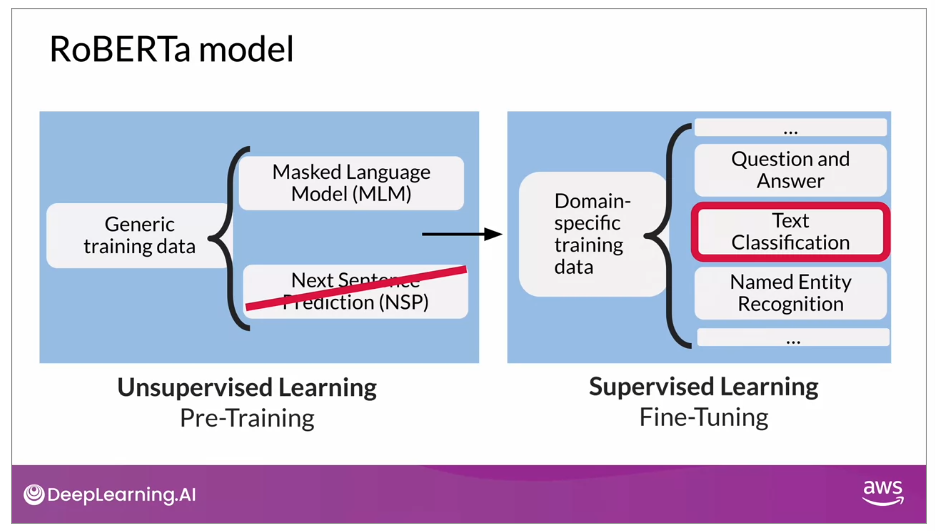

The RoBERTa model architecture builds on BERT's language masking strategy, but removes the next sentence pre-training objective. It also trains with much larger mini-batches and learning rates and with a 160 Gb of text. This model architecture changes focus on building an even better performing masked language model for the NLP downstream tasks.

## Train a Custom Model with Amazon SageMaker
The option to train or fine tune a model with custom code is called *bring your own script mode* in SageMaker. To start training a model in SageMaker you create a training job. The training job includes the following information:

+ The URL of the Amazon S3 bucket where you have stored the training data.
+ The compute resources that your want SageMaker to use for the model training. They are `ml` compute instances that are managed by SageMaker.
+ The URL of the S3 bucket where you want to store the output of the training job.
+ The Amazon Elastic Container Registry or Amazon ECR path, where the training code image is stored. SageMaker provides built in docker images that include deep learning framework libraries and other dependencies needed for model training and inference. Using *script mode* you can leverage these pre-built images for many popular frameworks (*e.g.* TensorFlow, PyTorch, Mxnet). 

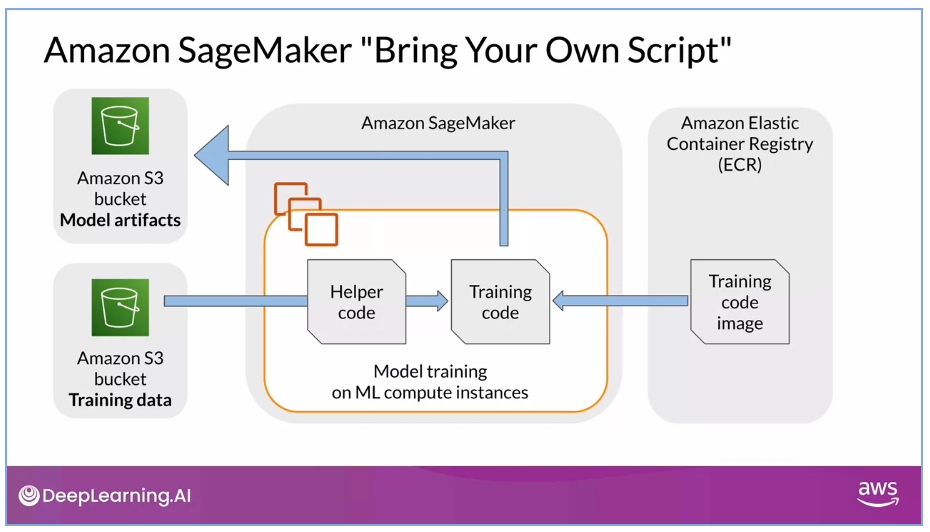

After you create the training job, SageMaker launches the `ml` compute instances and uses the training code and the training dataset to train the model. It saves the resulting model artifacts and other outputs in the S3 bucket you specify for the purpose.

The steps you need to perform are:

1. **Configure the train, validation and test datasets, and the evaluation metrics**: you can use the SageMaker `TrainingInput` class to configure a data input flow for the training. With it you define your datasets uploading them from an S3 bucket. If you write your custom model training code, make sure the algorithm code calculates and emits model metrics such as validation loss and validation accuracy. You can then define regex expressions to capture the values of these metrics from the Amazon Cloudwatch locks

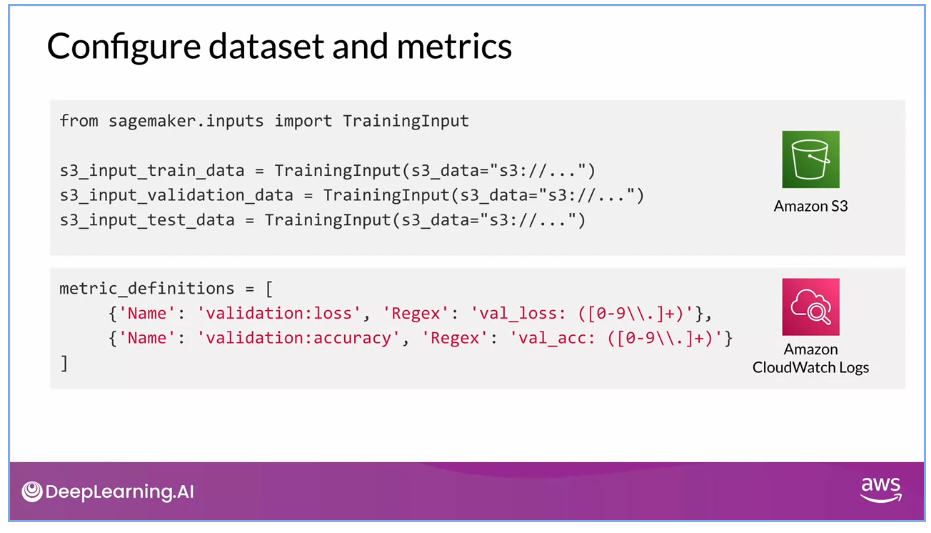

2. **Configure the model hyperparameters**: in this step we configure the hyperparameters of the model (*e.g.* **sequence length**, learning rate, epoch, batch sizes, etc). 

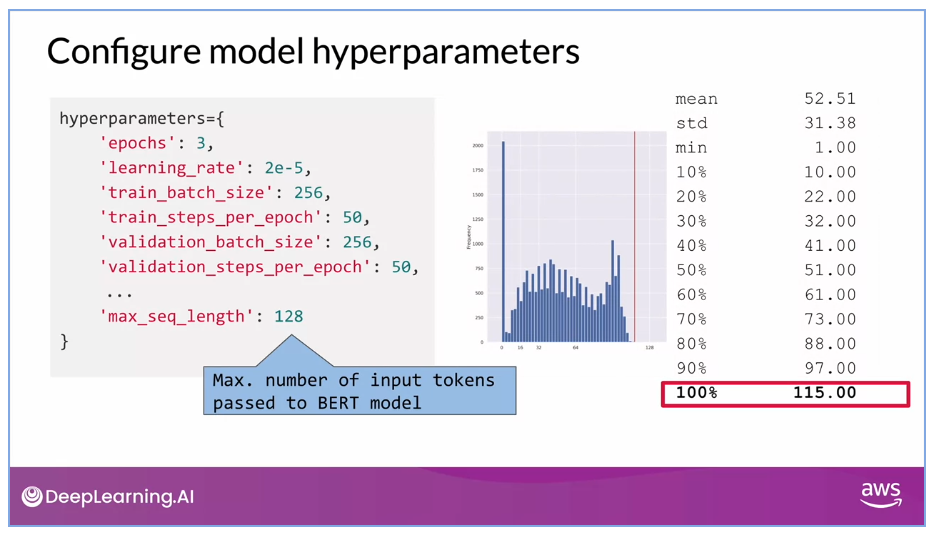

3. **Provide the custom training script**: first we import the hugging face transform library (it can be installed with `pip install`). Hugging Face provides a pre-trained RoBERTa model for sequence classification that already pre-configured RoBERTa for text classification tasks. As you can see below you can use the `RobertaConfig.from_pretrained` method to customize the number of labels for the classifier (`num_labels`), the ID to label mappings (`id2label` and `label2id`). You then download the pre-trained RoBERTa model from the hugging face library as seen below (`RobertaForSequenceClassification.from_pretrained`). Then you need to fine tune the model using your custom code(`train_model`), where you define the hypothesis/loss function and the optimizer. Then you write the training code. After updating the parameters, remember to include code which runs a validation loop after each epoch, in which it calculates the evaluation metrics you want to capture. 

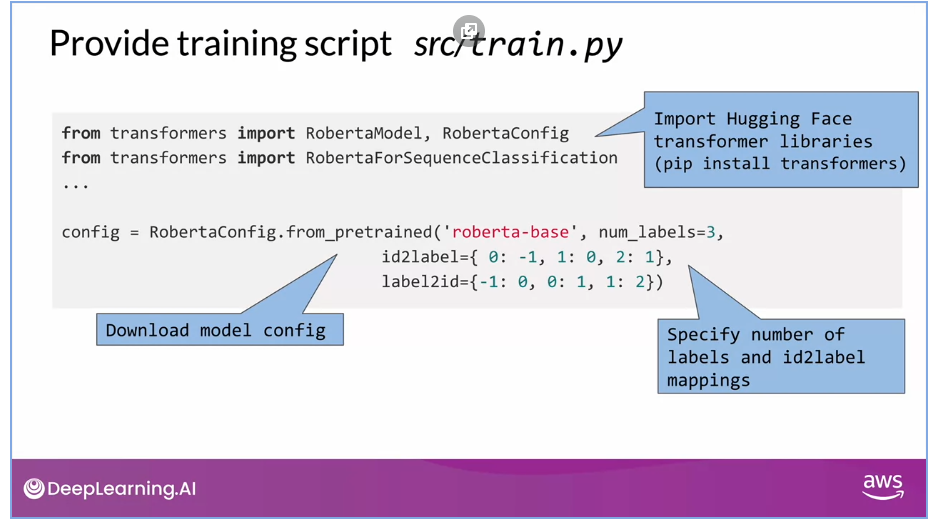

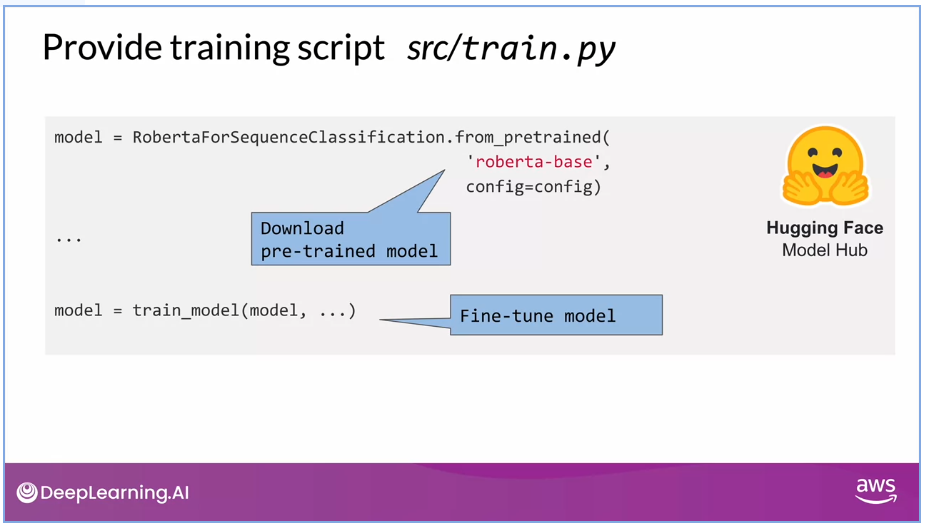

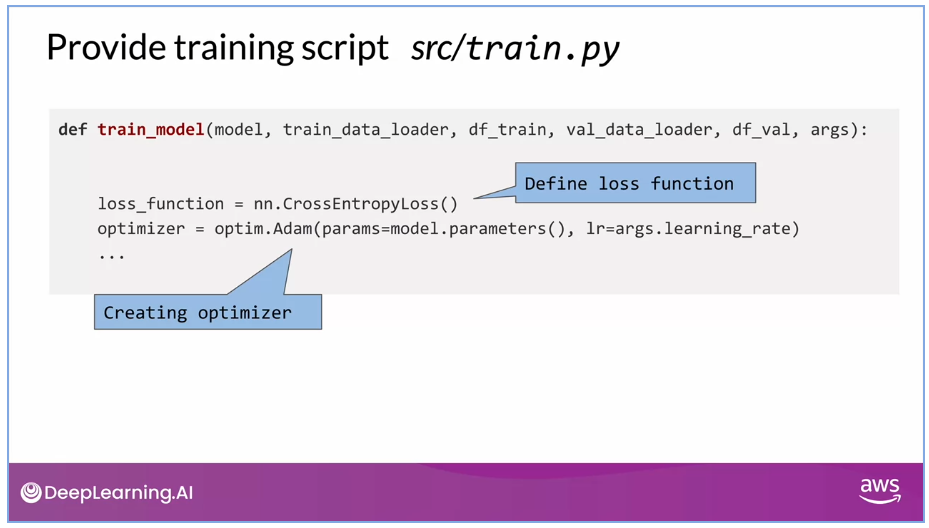

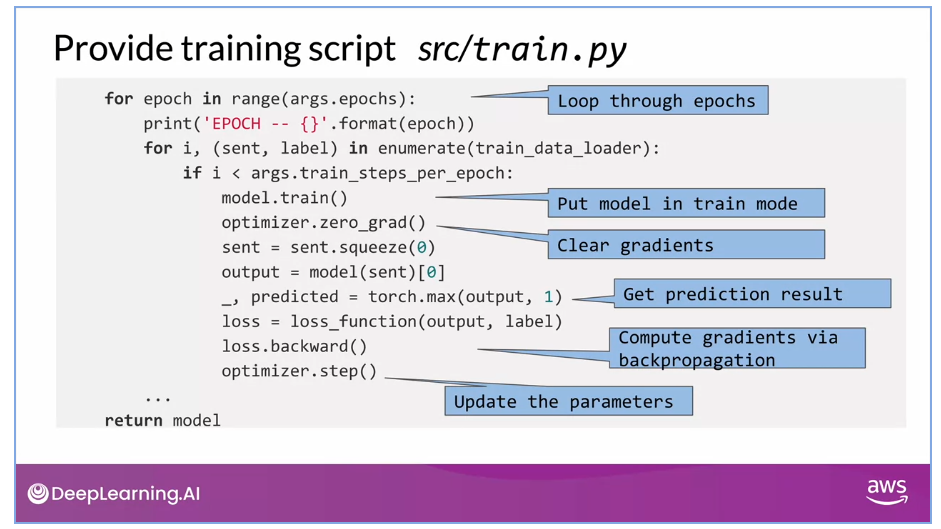

4. **Fit the model**: to fit the model you must create a `PyTorchEstimator`, where you specify the location of the model training script and the source directory (where the training script lays and the other additional dependencies listed in a `requirements.txt` file), the AWS instance types and instance count to run the model training, the PyTorch framework you're using

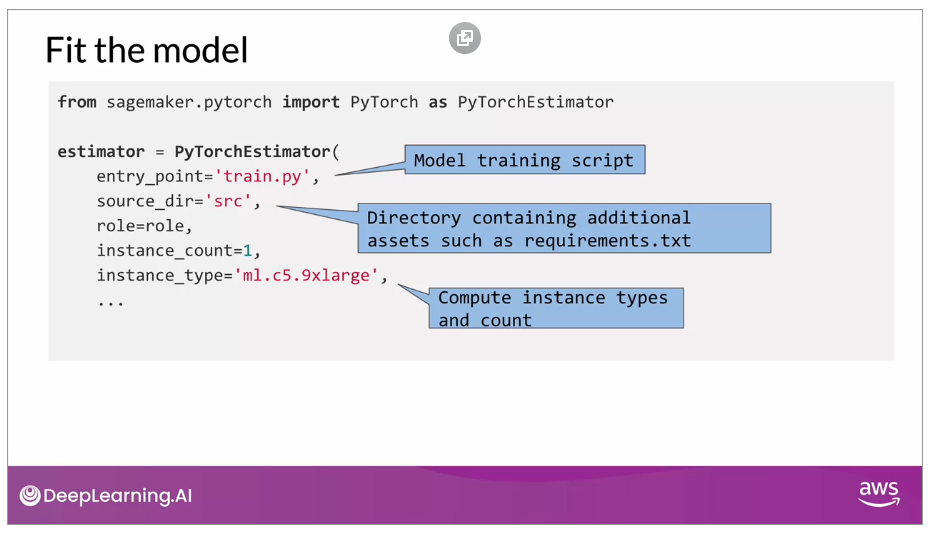

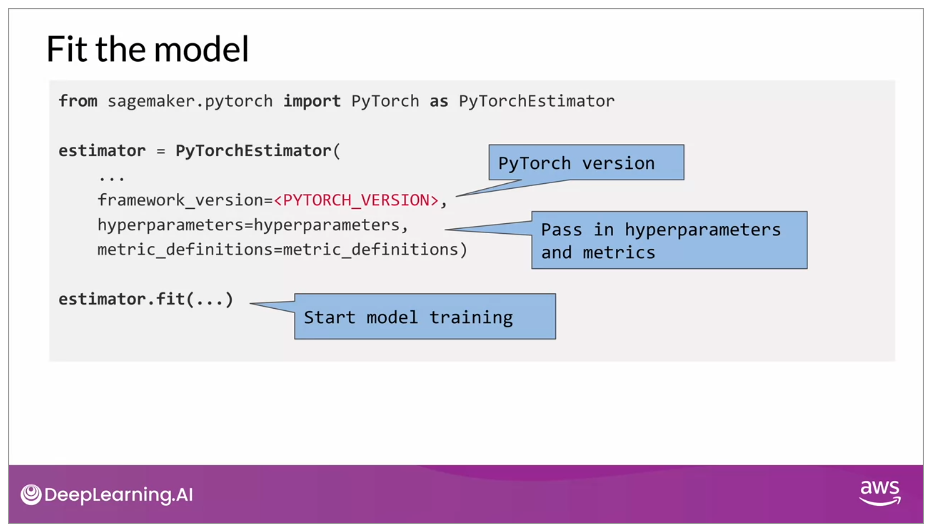

## Debug and Profile Models
Training machine learning models is difficult and often opaque process, especially deep learning models. It takes a long time, several training iterations and different combinations of hyperparameters before your model yields the desired accuracy. Also, system resources could be inefficiently used, making the model training expensive and compute intensive. 

**Debugging and profiling** your model training gives you visibility and control to quickly troubleshoot and take corrective measures if needed. For example, capturing metrics in real time during training can help you to detect common training errors such as 

+ **Vanishing and exploding gradients**: as we use deeper networks we face the possibility of having vanishing gradients, as we take the backpropagation gradients, as we return to the shallow layers the gradient could tend to vanish. On the other hand, we could have exploding gradients, where as we go to the shallower layers the gradient continues to increase.
+ **Bad initialization**: we usually initialize the neurons weights with random numbers. But if we choose a bad initialization technique we could end up in a vanishing/exploding gradient scenario, or a slow convergence scenario.
+ **Over-fitting**: as we train the weights of the neurons of our neural network to the training data, we could tend to over-adjust the parameters to the training sample, leading to over-fitting, decreasing the generalization capabilities of the model. 

All these issues impact your model's learning process, and debugging them is usually hard and even harder when you run distributed training. Another area you want to track is the system resource utilization monitoring and profiling. System resources can help you answer how many GPU, CPU, network and memory resources your model training consumes, helping you to detect and alert on bottlenecks so you can quickly take corrective actions. 

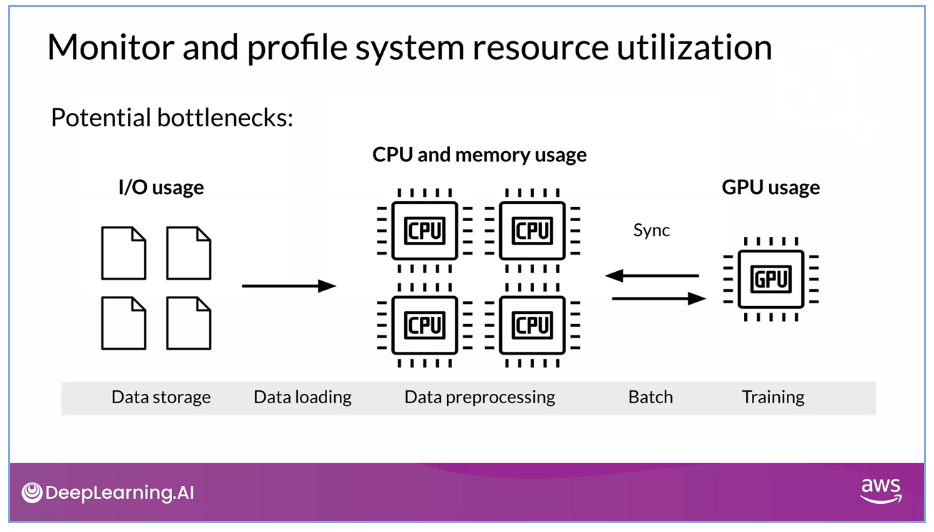

+ I/O bottlenecks when loading your data
+ CPU or memory bottlenecks when processing the data
+ GPU bottlenecks or under-utilization during model training

Based on the error/bug detection during the training process you can take early actions. For example using early stopping to avoid over-fitting or when an issue is found to avoid wasting money and time. Also you can configure notifications via email, or text message. 

## Debug and Profile Models with Amazon SageMaker Debugger
Amazon SageMaker Debugger is a tool to debug and profile your models. Debugger automatically captures real time metrics during the model training, such as training and validation loss and accuracy, confusion matrices and learning gradients to help you improve model accuracy. The metrics from Debugger can also be visualized in SageMaker Studio for easy understanding. Debugger can also generate warnings and remediation advice when common training problems are detected. 

Debugger automatically monitors and profiles your system resources such as CPU, GPU, network and memory in real time. Also providing recommendations on reallocation of these resources. This enables you to use your resources more efficiently during the model training and helps to reduce costs.

Debugger captures real time debugging data during the model training and stores this data in your secure S3 bucket. 

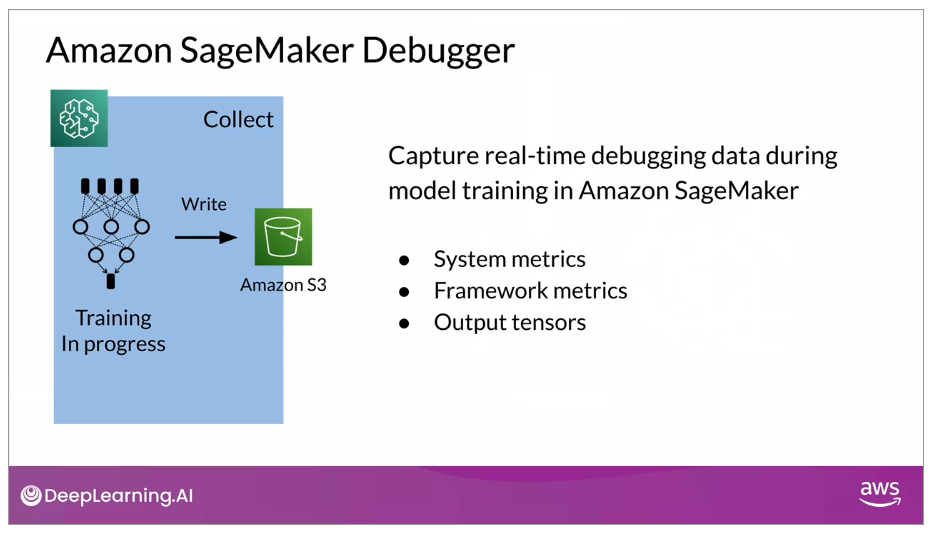

**System metrics** include:
+ GPU and CPU (and memory) utilization
+ Network metrics
+ Data input and output (I/O) metrics

**Framework metrics** include:
+ Convolutional operations in the forward pass
+ Batch normalization operations in backward pass
+ Data loader process between steps
+ Gradient descent algorithm operations

**Output tensors** are collections of model parameters that are continuously updated during the back propagation and optimization process of training machine learning and deep learning models. These include:
+ Scalar values (accuracy and loss)
+ Matrices (weights, gradients, input layers, and output layers)

While the model is training, Debugger also reads the data from the S3 bucket and runs real time continuous analysis through rules. Below you can see a list of the Debugger rules from which you can choose from to debug and profile your model during a training job.

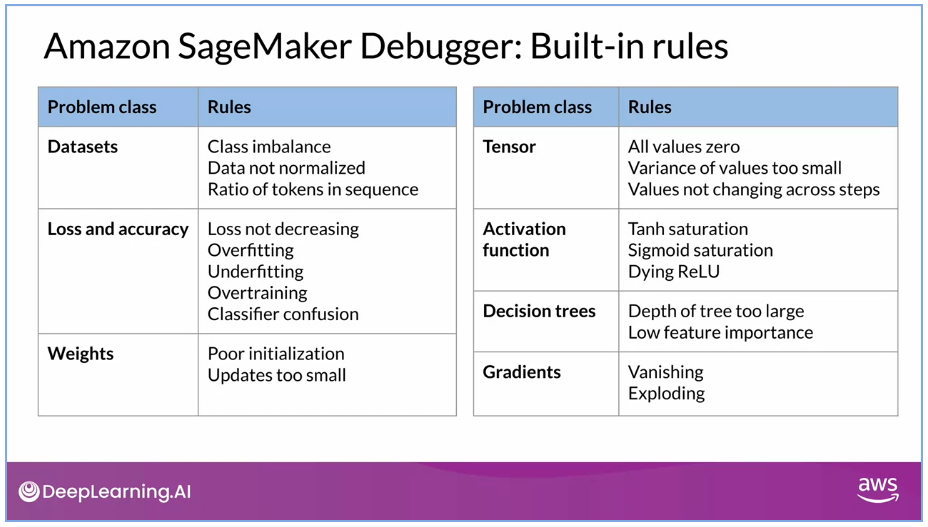

You can also take corrective actions. In case Debugger detects an issue, for example, the model starts to overfit, you can use Amazon CloudWatch events to create a trigger to send you a text message, email you the status or even stop the training job. 

You can also analyze the data in your notebook environment using the Debugger SDK or using the SageMaker Studio IDE.

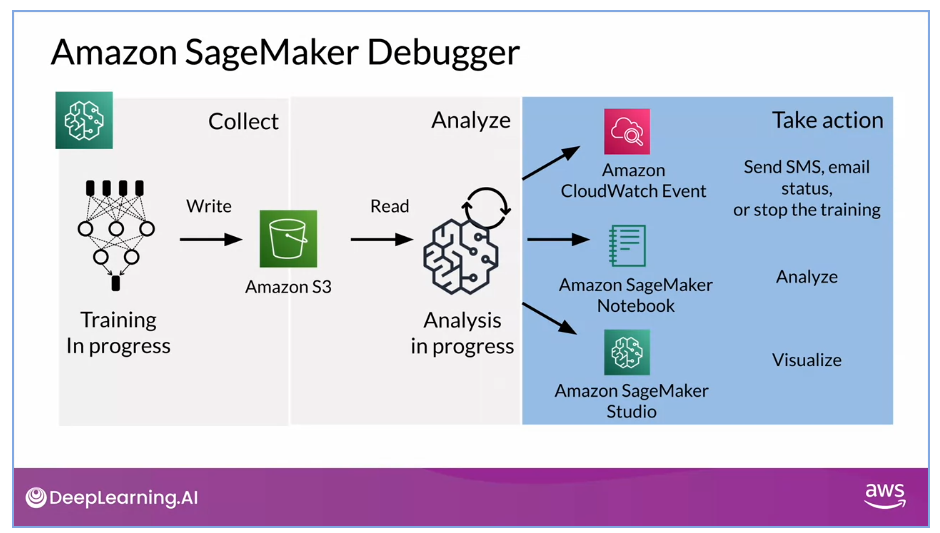

You can leverage the building rules to watch for common training errors. To build the **Debug rules for your model**:

1. You just select the rules you want to evaluate. 

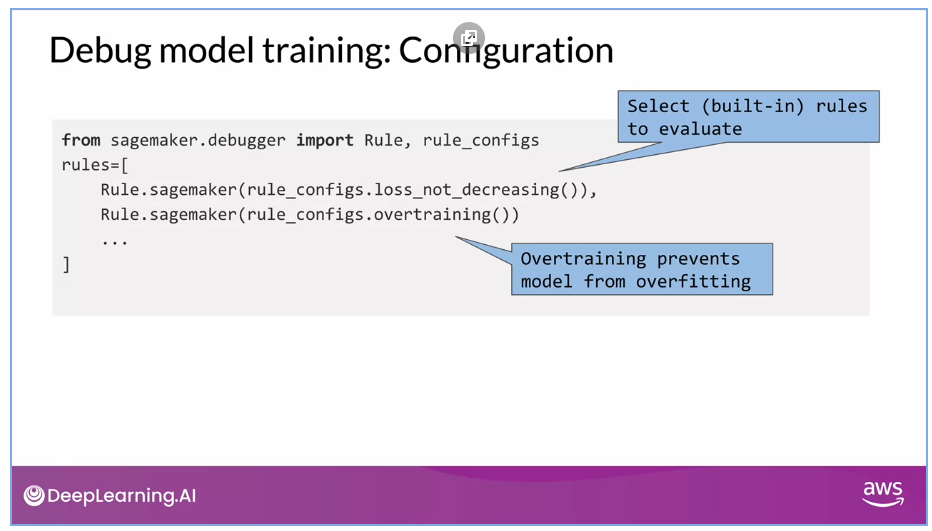

2. Then pass the rules with  the `rules` parameter in your estimator. SageMaker will then start a separate processing job for each rule you specify in parallel to your training job. This processing job will collect the relevant data and observe the metrics.

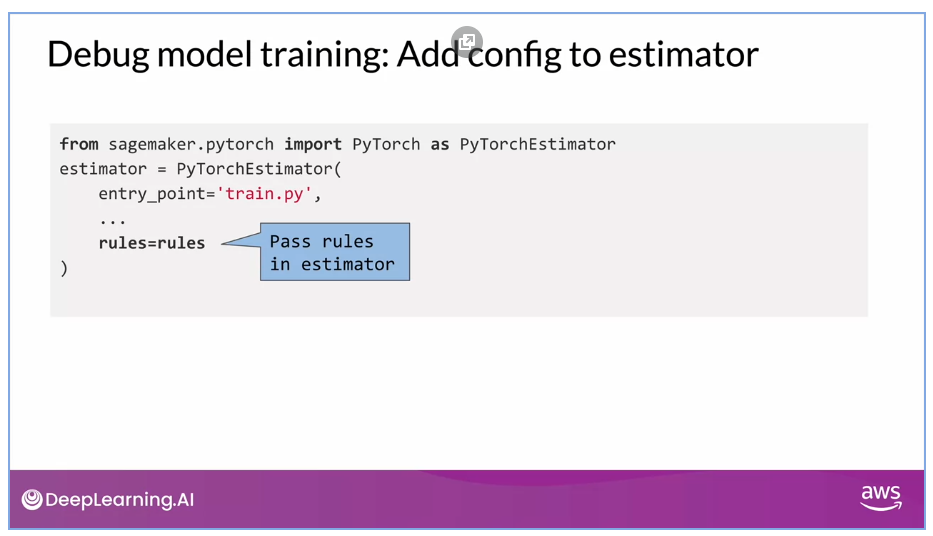

To **profile the system and framework metrics** for your training jobs, you need to perform very similar steps:

1. First you select the rules to observe again. If you select `ProfilerReport`  rule you will invoke all of the building rules for monitoring and profiling. By default Debugger collects system metrics every 500 milliseconds, and basic output tensors , *i.e.* scalar tensor outputs containing the loss and accuracy,  every 500 steps. You can modify the configuration if needed. To enable the framework profiling, configure the `framework_profile_params` parameter.

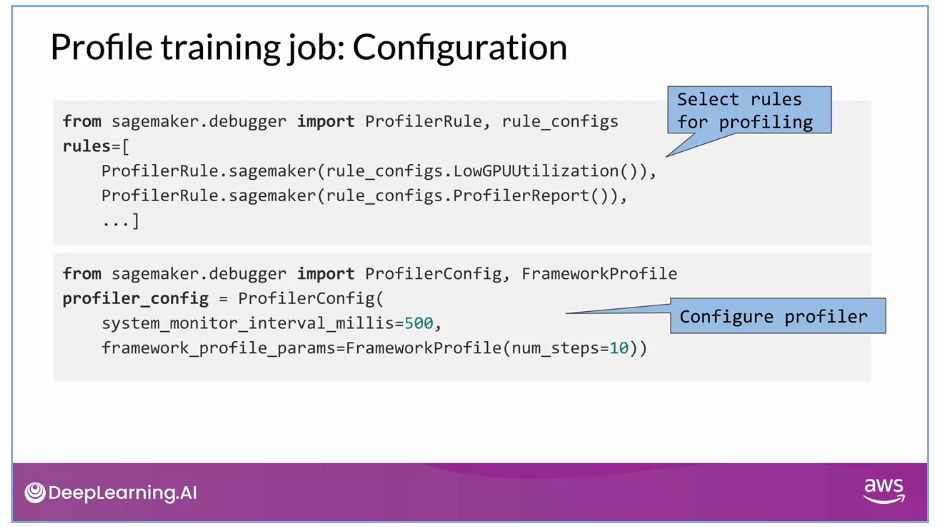

2. Then pass the rules and `profiler_config` in the estimator. **Note that the list of selected rules can contain the list of Debugging rules plus the profiling rules**. 

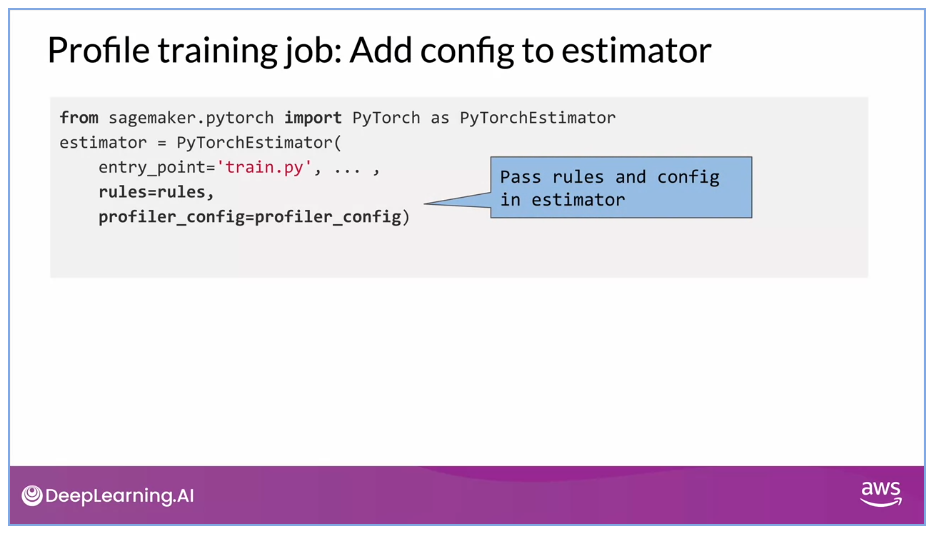

To analyze the results, for any SageMaker training job, the Debugger profiler report rule invokes all of the monitoring and profiling rules and aggregates the rules analysis into a comprehensive report. You can download the Debugger profiling report while your training job is running or after the job has finished from S3. 

At the top of the report Debugger provides a summary of your training job (in this section you can find the duration and time-stamps of different training phases).

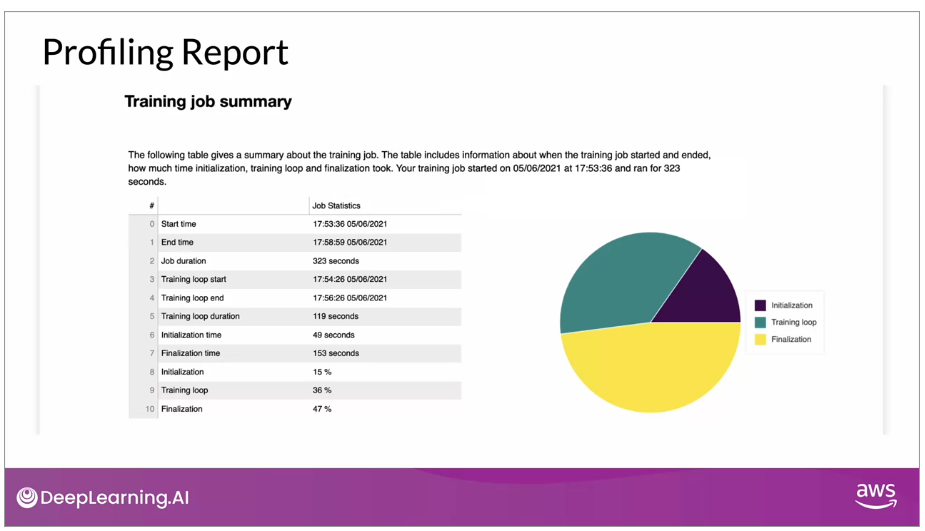

In the rule summary section, Debugger aggregates all of the real evaluation results, analysis, rule descriptions and suggestions.

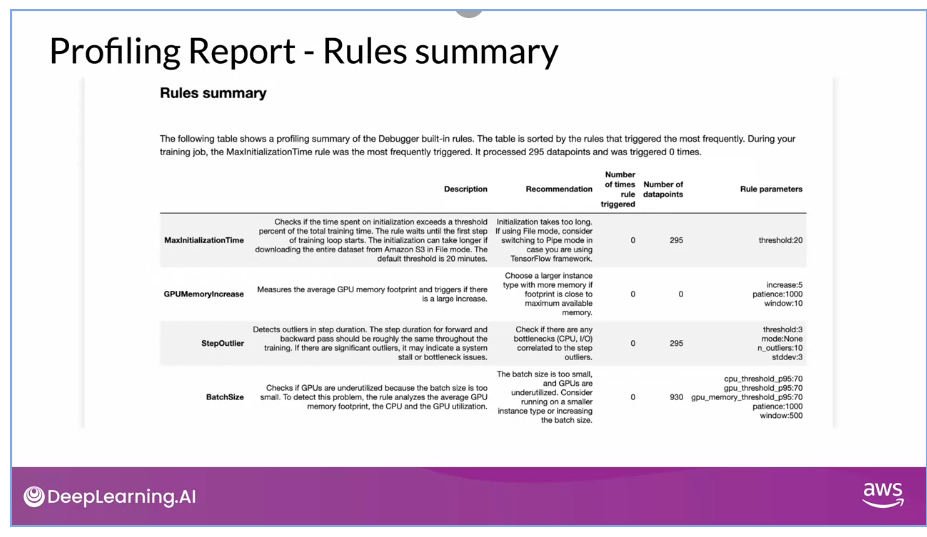

 The report also shows system resource utilization over time.

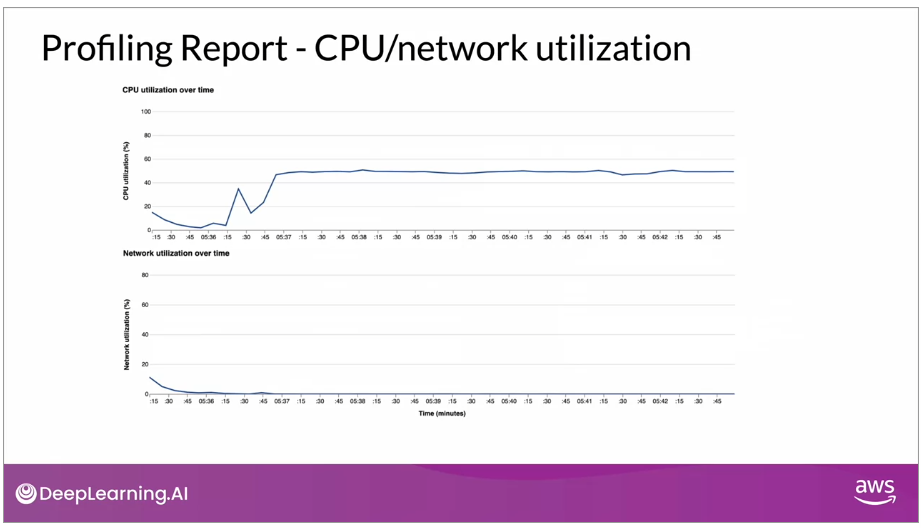

Debugger also creates a system utilization heat map which can help minimize the costs. Below you can see an example, where the darker the color the higher the utilization. With this you can take action to improve the utilization efficiency, by scaling down and save costs.

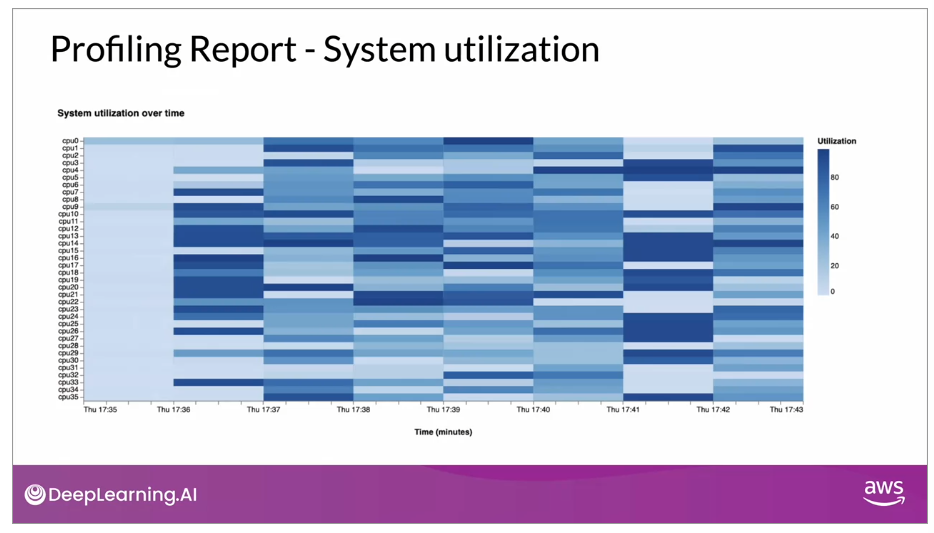



#### Important Links
![references](image-1.png)

https://www.coursera.org/learn/ml-pipelines-bert/supplement/eCTvo/week-2-optional-references

# **Week 3**: *Deploy End-To-End Machine Learning Pipelines*
***

## Machine Learning Operations (MLOps) Overview

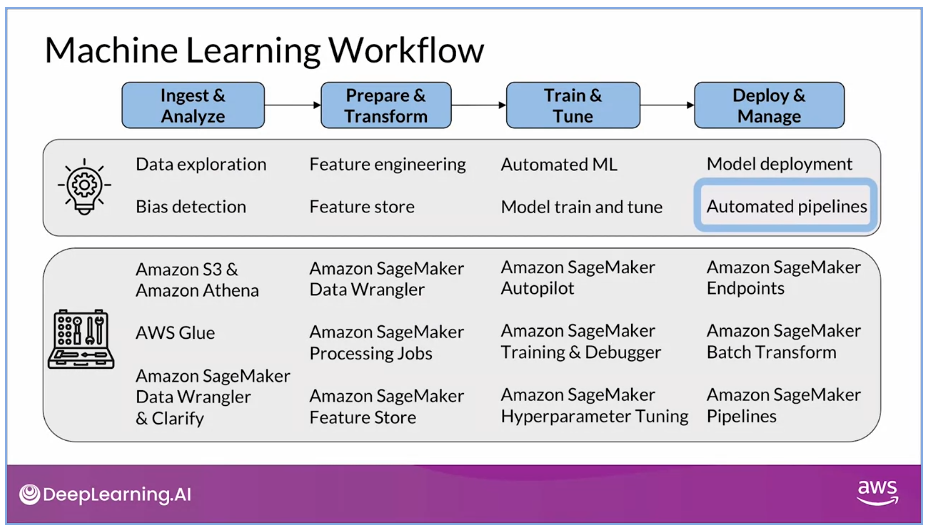

Automated pipelines span all of the workflow steps, including ingest and analyze, prepare and transform, train and tune, and finally deploy and manage. MLOps builds on DevOps  practices that encompass people, process, and technology. It also includes considerations and practices that are really unique to machine learning workflows.These practices are aim to deliver machine learning workloads quickly to production while still maintaining high quality, consistency and ensuring end-to-end traceability. 

There are some **key considerations** in ensuring that your models have a path to production:
+ Machine learning development lifecycle (MLDLC) $ne$ Software development lifecycle (SDLC)
    + The model development life cycle is difficult to plan for from a project management perspective. It typically includes longer experimentation cycles that you would see in a standard Agile software development process
    + It includes tasks like feature engineering and data preparation.
    + You have data processing code, as well as new inputs and artifacts to consider for versioning.
    
    The result is that when you start to look at automating the ML workflow, the inputs and artifacts that are generated across these tasks result in multiple disparate pipelines with dependencies that can be a bit more challenging stitched together than a typical software development workflow.
+ A model may be a small part of an overall solution: you might manually reading prediction requests and getting responses through a batch process or even withing your notebook on an ad-hoc basis. This is specially true in research environments. This results in multiple element integration to applications and running components. For this, there may be additional tasks like creating a REST API as a common interface for other applications to integrate with your model or even building applications that can respond to those reviews.
+ Multiple personas spanning the MLDLC: this can create challenges as these personas often have competing priorities and needs. There may also be skill gaps in building an operating machine learning workloads (*e.g.* a data scientist may not have a traditional IT background, creating the need of a deployment engineer to operate and host the model).
+ Integration with traditional IT practices: many teams have processes in place supporting different regulatory or internal corporate requirements. This means that when you're creating your machine learning pipeline, sometimes you also need to be able to ensure that traditional practices can be included inside the steps of your pipeline.

MLOps aims to provide a path to production by reducing manual hand-offs between the steps in your workflow, increasing automation within those steps in your workflow, and then going a step further to orchestrate the steps across your workflow. But you don't want to just apply automation, you also want to improve the quality of your models (*i.e.* establish mechanisms and quality gates inside your ML pipeline)

Let's go through a typical workflow tasks without any MLOps practices applied. 

1. **Data ingestion and analysis**: a data engineer may create a raw dataset and manually send it to a data scientist.
2. **Model building**: a data scientist the iterates through feature engineering, data transformations, hyper-parameter tuning, and algorithms experimentation $\rightarrow$ generate a candidate model
3. **Model deployment**: the data scientist hands-off the model to a deployment team. If there has been limited communication between these teams there are usually a lot of delays because that model is essentially a black box to the deployment engineer. There is limited visibility into how that model was built, how you would consume that model, and then how you monitor that model. 
4. **Model integration**: once the model is deployed, a software engineer usually needs to create or make changes to applications that are going to use the model. 
5. **Model operation**: a team must operate the model in production; this typically entails monitoring the model, retraining strategy. 

![Alt text](image-2.png)

With team cross-collaboration with automation you can reduce those hand-offs and delays in a workflow. You can also incorporate centralized **Model Registry** (this holds key metadata and information about how your model was built, how the model performed with evaluation metrics, and can be used to trigger downstream deployment workflows). This means that there is no longer a hand-off of a black-box model. 

![Alt text](image-3.png)

Depending on the deployment, there may be additional needs of additional code or packaging for consumption (software engineers will be needed to provide the steps and code needed to create or update the API that will then be used to create a RESTful interface or a commonly defined interface for integrating with other applications). Finally, for operating the model, the correct monitors need to be identified and put in place early through the cross-functional teams (traditional systems or performance monitors, model quality drift or data drift).

To coordinate the performance of these steps across your workflow you need **orchestration**. With **automation** you're typically looking at automating the step and the tasks within that step that are required to accept an input(s) and produce some type of output or artifact. It is important to not only automate these individual tasks, but also the end-to-end ML workflow as well. To do this you need to add a layer that can provide overall **orchestration**, in defining when and how these individual steps with automated tasks are run. **Automation** is great for reducing cycle time and deploying more quickly; **orchestration** help to implement quality gates between your steps to determine when the pipeline should proceed to the next step.

![Alt text](image-4.png)

**Quality gates** refer to having an automated, or manual checkpoint within your pipeline that gates whether then next step in your pipeline can be run based on some type of criteria or a conditional step that you define. 

![Alt text](image-5.png)

## Creating Machine Learning Pipelines
When you look at the high level tasks in your ML workflow, when you create a pipeline, you aim to automate the task and orchestrate the sequence and conditions of running that task. You also need to consider your **pipeline triggers**. 

Another key goal in building an effective pipeline is **establishing traceability**: ideally you have a central view of how pipeline artifacts were built (this is important not only for visibility and support, but also in the event of needing to recover any resource or artifact that's part of your pipeline). 

### Data Tasks

1. **Data ingestion for *model development* and *model retraining***. It is generally recommended to establish a **data lake** that provides governed access to data scientists or automated processes. This allows data scientists to quickly start a model development activities, and it also ensures there's traceability for that data because you know which data scientists have checked out specific data sets.

![Alt text](image-6.png)

2. **Data pre-processing and feature engineering**. Once you have the raw data, you then usually transform it into a format that the algorithm can understand and that you can use for model training or building activities. This can include processes or set of tasks (*e.g.* Python script or even another model that's being used to transform your data into features). Your input is the raw data and the output are the transformed features, model artifacts (if used), and training, validation and test datasets. *It is key to version both the code you're using to generate the transformations, as well as the data/artifacts produced* to ease traceability.

![Alt text](image-7.png)

3. **Data validation**. There is a number of validation tests that could also be incorporated into your ML pipeline to improve quality (*e.g.* statistics that look for signals of potential data quality issues)

![Alt text](image-8.png)

### Model Building Tasks
1. **Model training, evaluating and versioning**. In this step the input are the train, validation and tests datasets produced in the previous step and the output are a set of candidate models, or the best performing model based on your evaluation criteria. 

![Alt text](image-9.png)

2. **Model deployment and consumption**. Here you take the best performing model's artifacts from the previous step and deploy it for consumption. This can cate two different forms: i) *batch mode*, where you send batch  records for predictions and then receive a batch response; and ii) *online/real-time/persistent end-point*, where the end-point consistently serves prediction requests and responses through a serving stack. 

![Alt text](image-10.png)

### Operating Tasks
1. **Logging and monitoring**. The input of this step is the model(s) deployed in the previous step that is available for consumption. Although operating tasks are at the end of the workflow, when you're setting up your pipeline you really need to consider your operating tasks early so that they can be incorporated into your workload early. In this step you can log the payload received by the model and the output produced by it. Also you can collect metrics (CPU utilization, request volume, health of the system).

![Alt text](image-11.png)

2. **Additional feedback mechanisms**. One common challenge is being able to have central visibility into your ML workflow, across all of the different personas and roles that are typically involved in an end-to-end ML workflow. This could be having visibility into the status of your pipeline, knowing when a specific version of a model is deployed to production, visibility into the system performance over time. **Dashboards** can serve as a central feedback mechanism for your ML pipelines as well as our deployed models.

![Alt text](image-12.png)

**Orchestration** helps you coordinate those steps that are performed across your end-to-end workflow. It allows you to manage the end-to-end traceability of your pipeline. This is done by focusing on using automation to capture the specific inputs and outputs of a given task, and the artifacts that are then produced by those tasks, and the bringing them all together in a controlled end-to-end pipeline.

## Model Lineage & Artifact Tracking
**Model lineage** refers to understanding and tracking all of the inputs that were used to create a specific version of a model. This includes the version of the data used to train an evaluate the model, the version of the code and the hyper-parameters that were used to build the model, the version of the algorithm used, and even the version of the docker images that were used to train the model, as well as the versions of the packages used.

![Alt text](image-14.png)


This is a lot of information to track. This is where **model registry** comes in: it is a central store for managing model metadata and model artifacts. When you incorporate it into the automated pipeline, it can provide traceability and auditability for your models, allowing you to effectively manage models, especially when you begin to manage at scale and you have tens or hundreds or even thousands of models. A model registry also give you the visibility into how each of the model versions was built.

An **artifact** is the output of a step or task that can be consumed by the next step in a pipeline or deployed directly for consumption. When you have a machine learning workflow with its corresponding tasks, and you're orchestrating these tasks, for each of them you have a consumable artifact that becomes the input to the next task. Each of these artifacts has different versions associated with them. A machine learning pipeline provides a consistent mechanism to capture the metadata and the versions of the inputs that are consumed by each step, as well as the artifacts that are produced by each step. This is important because of many reasons. **Operational efficiency**: when you need to debug something, it's important to know what version is deployed at any given time, as well as what versions of the inputs were used to create that deployable artifact; **reliability of  the workload**: with this you can recover deleted endpoints, and avoid disrupting your service. 

![Alt text](image-15.png)

## Machine Learning Pipelines with Amazon SageMaker Pipelines
**SageMaker Pipelines** allows you to create automated workflows using a Python SDK, that's purpose-built for automating model-building tasks. You can also visualize your workflow inside Amazon SageMaker Studio and integrate natively with SageMaker Model Registry. This allows you to capture some of the model metadata seen in the previous section (*e.g.* model artifacts in S3, evaluation metrics). **Model registry** also allows you to choose the best performing model that you want to approve for deployment. 

Finally, **SageMaker Projects** allows you to extend your pipelines, and incorporate CI/CD practices into your machine learning pipelines. This includes things lke source and version control for a true end-to-end traceability.

![Alt text](image-16.png)

SageMaker Pipelines has three primary components:
1. **Pipelines**: allows you to build automated model building workflows using your Python SDK (they can be visualized in SageMaker Studio).
2. **Model Registry**: stores metadata about the model and has built-in capabilities to include model deployment approval workflow as well.
3. **Projects**: includes built-in project templates, as well as the ability to bring your own custom templates that stablish and pre-configured a pattern for incorporating CI/CD practices into your *model building pipeline* and your *model deployment pipeline*. 

![Alt text](image-17.png)

### SageMaker Pipelines
**SageMaker Pipelines** allows you to take those ML workflow tasks and automate them together into a pipeline that's built in through code. A Python SDK is provided, so that you can build and configure these workflows. Pipelines provides a server-less option for creating and managing automated ML pipelines. 

![Alt text](image-18.png)

#### **Data processing**
This supports SageMaker processing jobs that you can use to transform your raw data into your training datasets. SageMaker processing expects your input to be an S3. It also expects your data processing script to be an S3 as well. The output of this step is a training/validation datasets stored in S3.

![Alt text](image-19.png)
    
1. Configure your inputs & outputs

![Alt text](image-20.png)

2. Configure the processing step: you use the built-in `ProcessingStep` object, where your provide as a parameter the route to the Python data processing script. 

![Alt text](image-21.png)

### **Training Step**
In this step you're going to set upt and configure a SageMaker training job (we've seen this in previous weeks). Here you want to use your training dataset to train the model, and the evaluation dataset to evaluate your model. The output of this step is a model artifact that will be store in S3

![Alt text](image-22.png)

1. Configure hyper-parameters

![Alt text](image-23.png)

2. Configure estimator: you input the hyper-parameters you want to use, the version of the library, the configuration of the compute resources, the training script

![Alt text](image-24.png)

3. Configure the training step: here again you use the Pipeline Python SDK, and use as input the `estimator` generated in the previous step, the train/validation datasets, and also the output configuration, where you want to store the output model artifact in S3

![Alt text](image-25.png)

### **Evaluation Step**
Here you'll use a processing job again, but this time for model evaluation. In this case you'll use the holdout test dataset, generated in the first step alongside the train and evaluation datasets. You'll also provide your trained model artifact, and the model evaluation Python script. The processing job will load your model, run your tests in batch-mode, and then output the evaluation metrics to the S3 bucket that you specified.

![Alt text](image-26.png)

Below is an example for the BERT-based model classifier

![Alt text](image-27.png)

Once you have the results of the evaluation script, you then can visualize the results. **You can use the output of this step to determine if your model should be deployed.**

![Alt text](image-28.png)

1. Define output: here you configure a `PropertyFile`, which stores information about the output of a processing job. This is useful when you want to analyze the results of a processing step so that you can then decide how a conditional step should be executed. In this case the property file contains the evaluation metrics, which will then be used in a conditional step that determines whether or not you want to deploy this model based on the metrics in that file.

![Alt text](image-29.png)

2. Configure the processing step: you use the Pipeline SDK this uses the inputs you identified (model artifact, test dataset), alongside the model evaluation Python script. Also you must specify the S3 location where the output will be stored and the property file configuration for your evaluation report.

![Alt text](image-30.png)

### **Condition Step**
You use your evaluation metrics that 